In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [4]:
def plot_confusion(cm, classes, title):
    plt.figure(figsize=(16, 14))  # 👈 wider plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=90)  # 👈 avoid overlapping
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def evaluate_model(y_true, y_pred, class_labels, title):
    print(f"\n📌 Results for {title}")
    print(classification_report(y_true, y_pred, target_names=class_labels))
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion(cm, class_labels, title)


In [5]:
# Load the 34-class reduced dataset
df = pd.read_parquet("/content/drive/MyDrive/CICIoT2023/Feature_Reduced/34class_reduced.parquet")

# Separate features and label
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)


🕒 Random Forest time: 206.45 seconds

📌 Results for Random Forest (34-class)
                         precision    recall  f1-score   support

       Backdoor_Malware       0.97      0.99      0.98     16456
          BenignTraffic       0.85      0.89      0.87     16900
       BrowserHijacking       0.95      0.99      0.97     16456
       CommandInjection       0.96      0.99      0.97     16456
 DDoS-ACK_Fragmentation       1.00      1.00      1.00     16900
        DDoS-HTTP_Flood       1.00      1.00      1.00     16456
        DDoS-ICMP_Flood       1.00      1.00      1.00     16900
DDoS-ICMP_Fragmentation       1.00      1.00      1.00     16900
      DDoS-PSHACK_Flood       1.00      1.00      1.00     16900
       DDoS-RSTFINFlood       1.00      1.00      1.00     16900
         DDoS-SYN_Flood       1.00      1.00      1.00     16900
         DDoS-SlowLoris       0.99      1.00      1.00     16456
DDoS-SynonymousIP_Flood       1.00      1.00      1.00     16900
         DDo

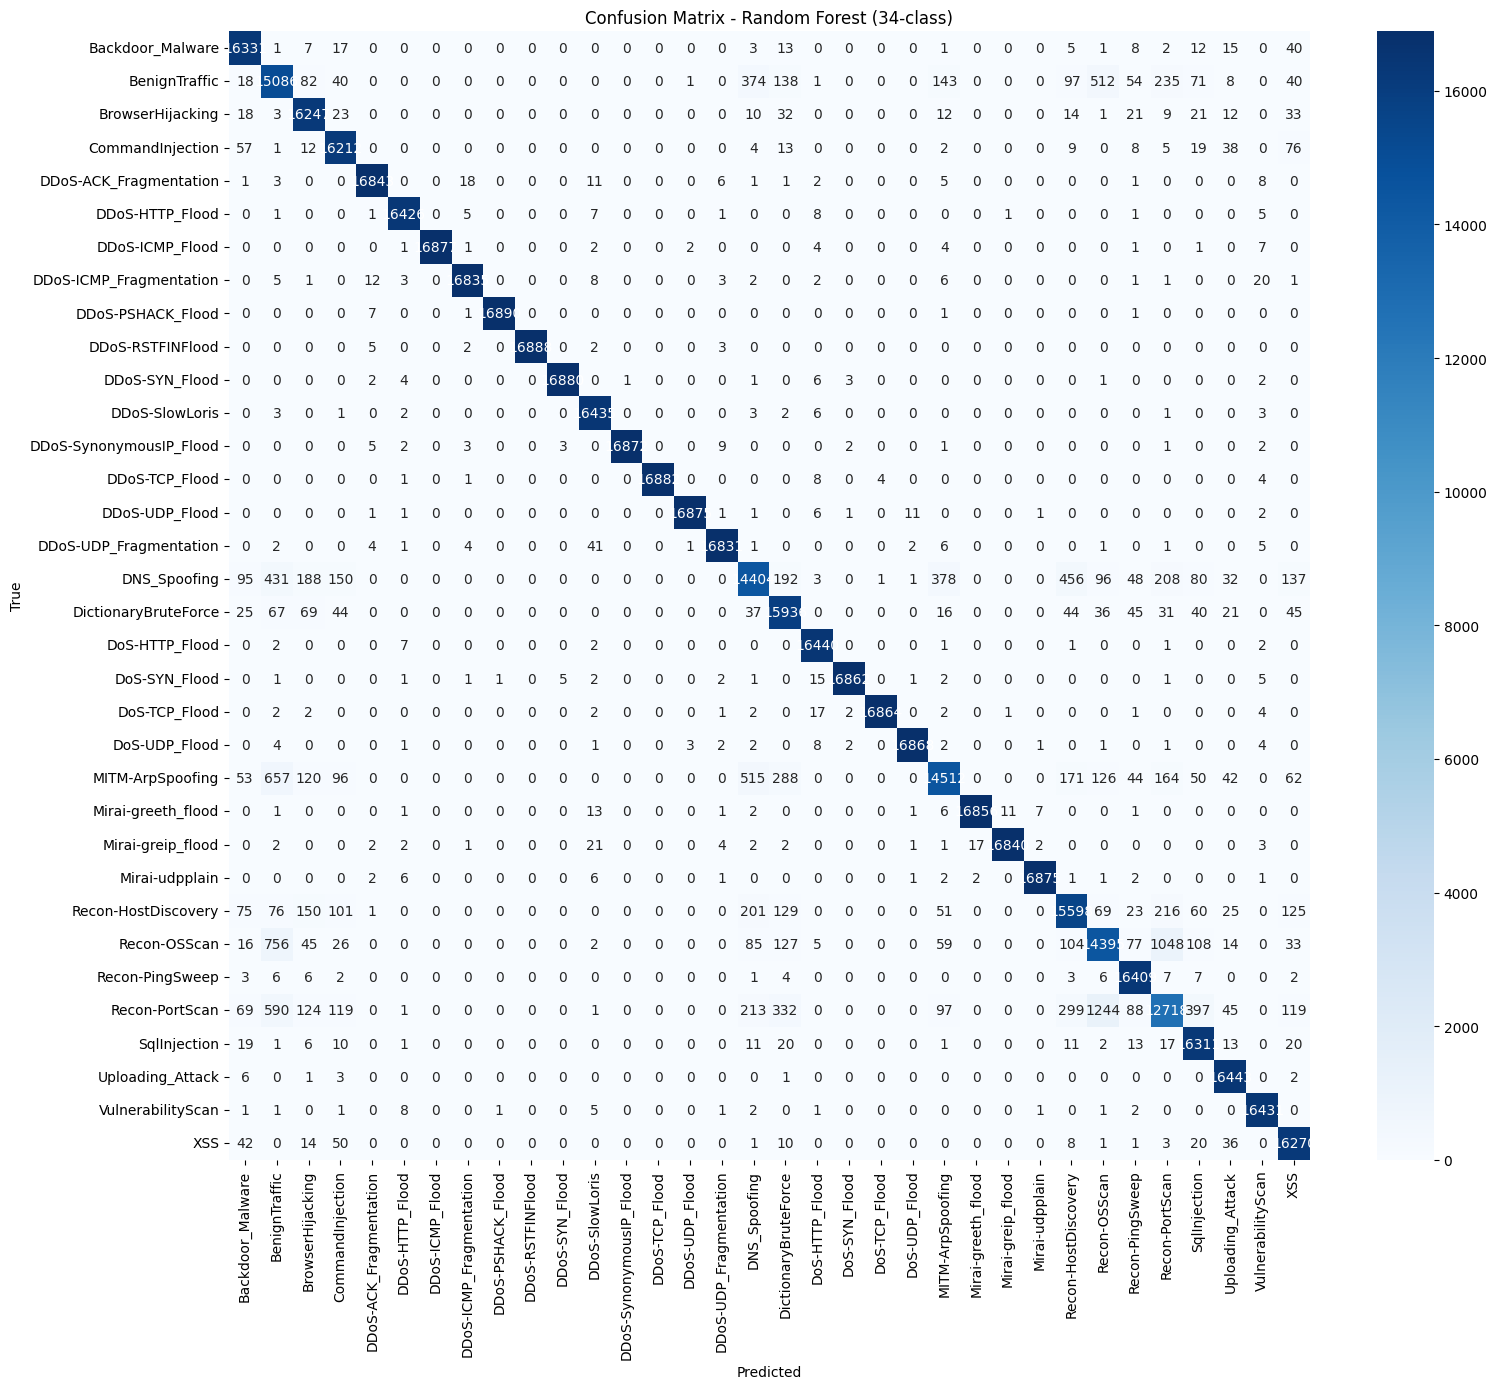

In [6]:
start = time.time()
rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
end = time.time()

print(f"🕒 Random Forest time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_rf, class_names, "Random Forest (34-class)")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 40 epochs took 312 seconds
🕒 Logistic Regression time: 313.06 seconds

📌 Results for Logistic Regression (34-class)
                         precision    recall  f1-score   support

       Backdoor_Malware       0.18      0.09      0.12     16456
          BenignTraffic       0.34      0.47      0.40     16900
       BrowserHijacking       0.24      0.13      0.17     16456
       CommandInjection       0.67      0.17      0.28     16456
 DDoS-ACK_Fragmentation       0.65      0.95      0.77     16900
        DDoS-HTTP_Flood       0.52      0.72      0.60     16456
        DDoS-ICMP_Flood       1.00      1.00      1.00     16900
DDoS-ICMP_Fragmentation       1.00      0.97      0.99     16900
      DDoS-PSHACK_Flood       0.85      0.98      0.91     16900
       DDoS-RSTFINFlood       0.99      1.00      0.99     16900
         DDoS-SYN_Flood       0.45      0.95      0.61     16900
         DDoS-SlowLoris       0.29      0.26      0.28     16456
DDoS-SynonymousIP_Fl

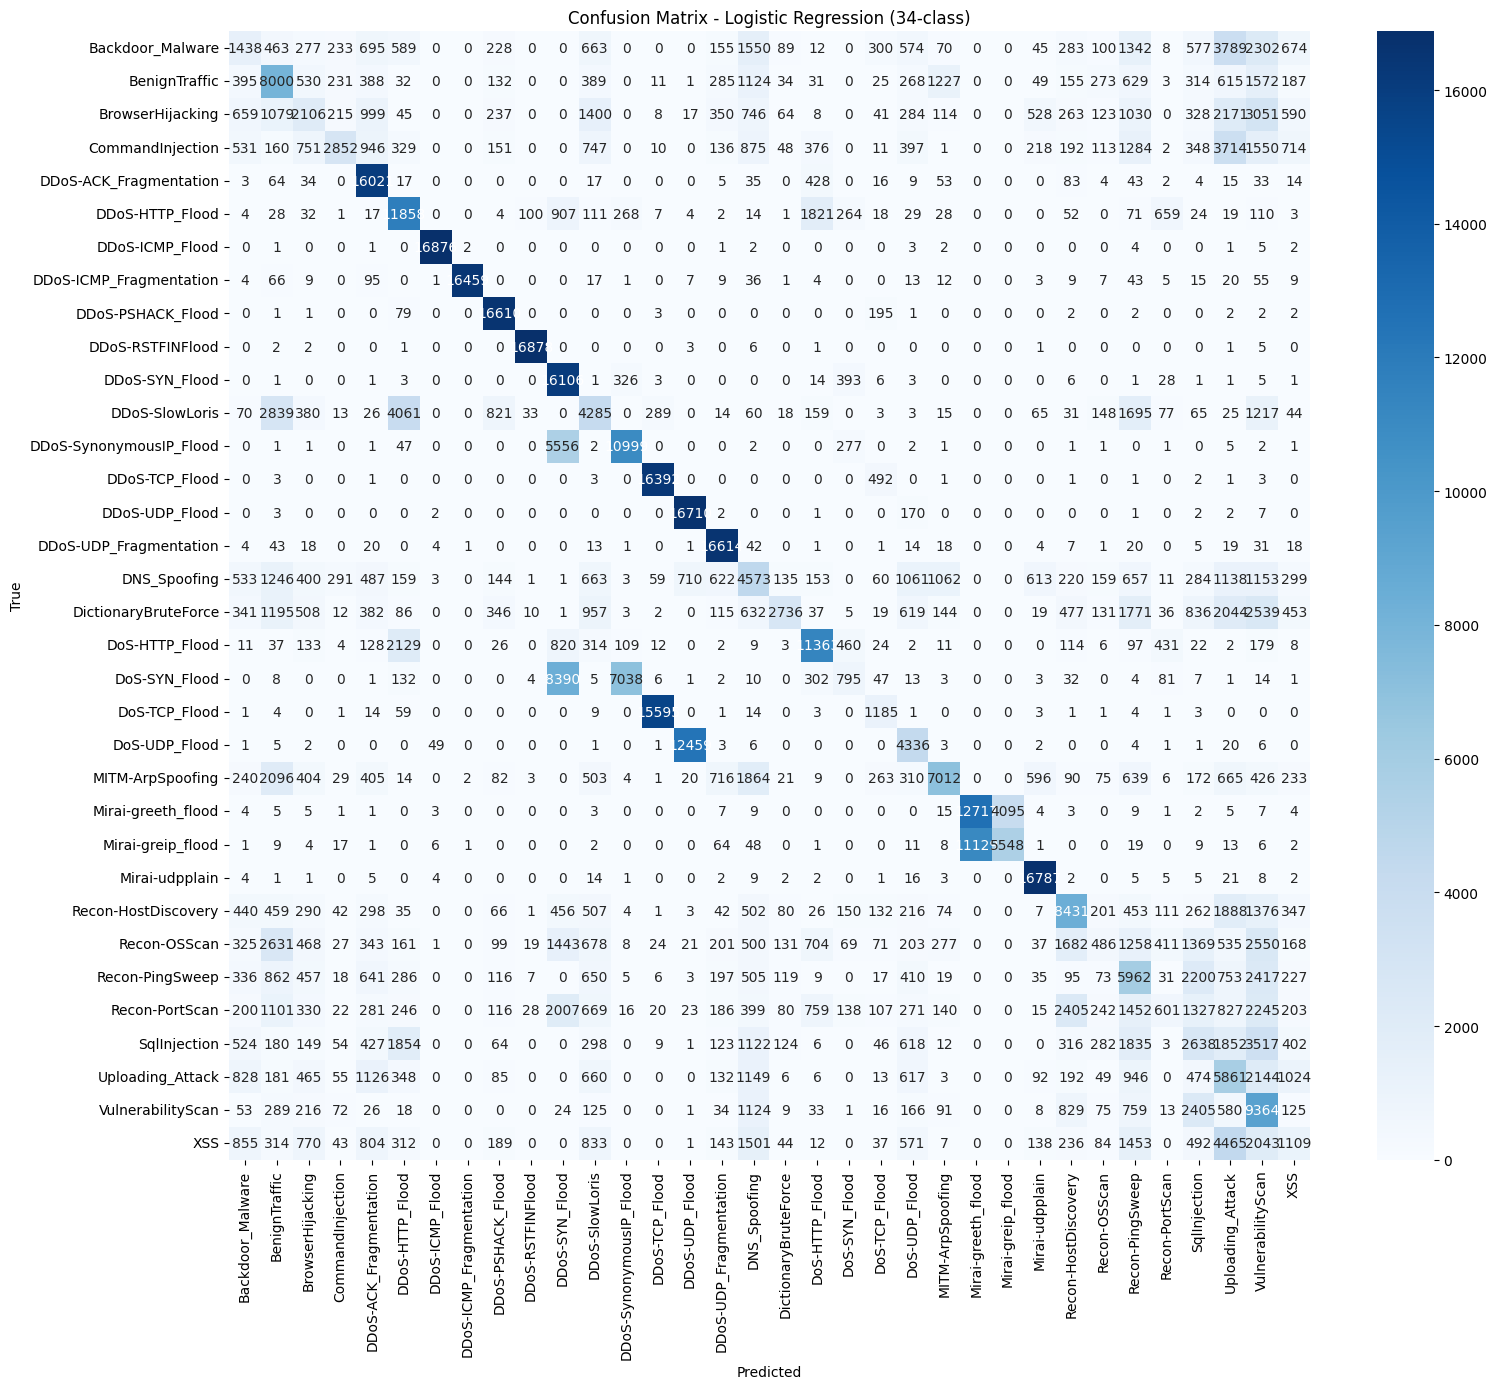

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    max_iter=300,          # Reduced from 1000
    tol=1e-2,              # Loosen convergence
    n_jobs=-1,             # All CPU cores
    verbose=1              # Show iteration progress
)

start = time.time()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
end = time.time()

print(f"🕒 Logistic Regression time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_lr, class_names, "Logistic Regression (34-class)")


🕒 AdaBoost time: 747.80 seconds

📌 Results for AdaBoost (34-class)
                         precision    recall  f1-score   support

       Backdoor_Malware       0.25      0.49      0.33     16456
          BenignTraffic       0.00      0.00      0.00     16900
       BrowserHijacking       0.00      0.00      0.00     16456
       CommandInjection       0.00      0.00      0.00     16456
 DDoS-ACK_Fragmentation       0.74      0.91      0.82     16900
        DDoS-HTTP_Flood       0.00      0.00      0.00     16456
        DDoS-ICMP_Flood       1.00      0.00      0.00     16900
DDoS-ICMP_Fragmentation       0.49      0.97      0.65     16900
      DDoS-PSHACK_Flood       1.00      0.96      0.98     16900
       DDoS-RSTFINFlood       0.99      1.00      0.99     16900
         DDoS-SYN_Flood       0.44      0.00      0.00     16900
         DDoS-SlowLoris       0.15      0.99      0.26     16456
DDoS-SynonymousIP_Flood       0.51      0.98      0.67     16900
         DDoS-TCP_Floo

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


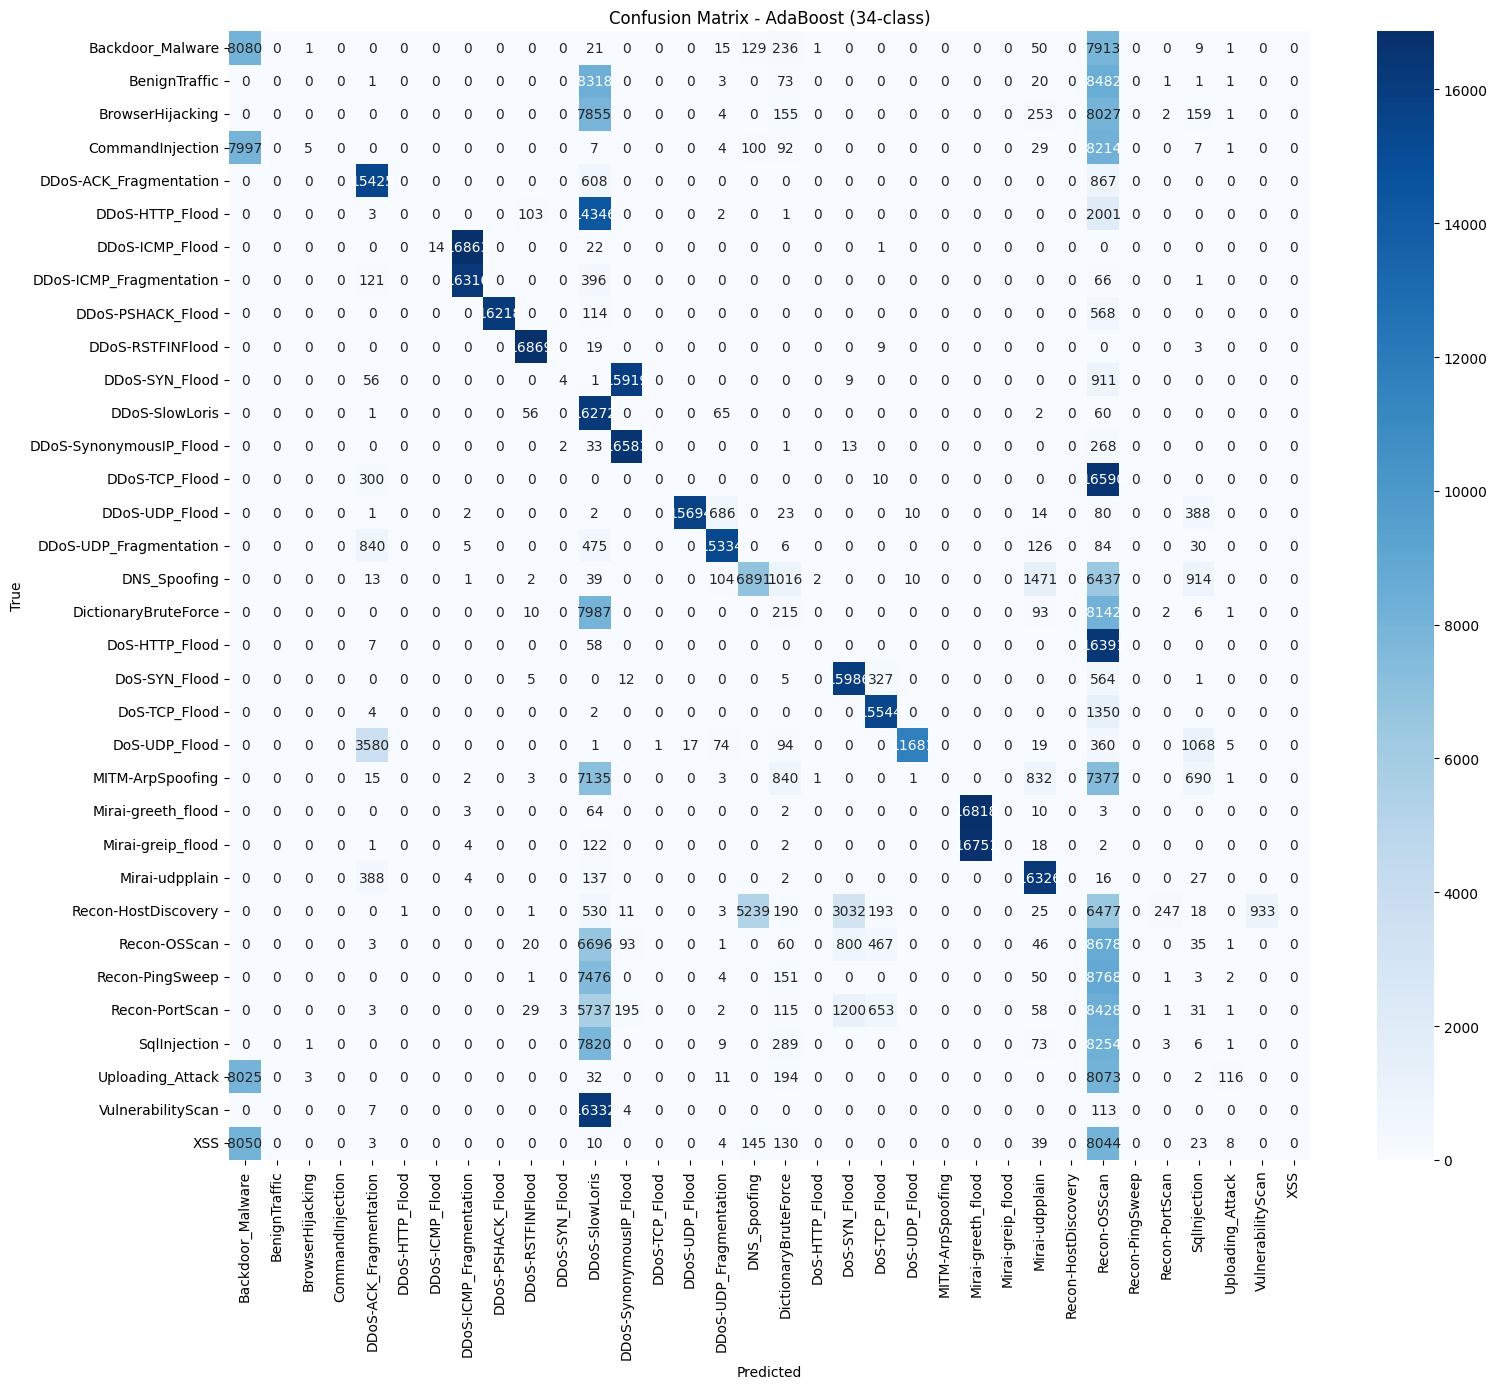

In [9]:
start = time.time()
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)
end = time.time()

print(f"🕒 AdaBoost time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_ab, class_names, "AdaBoost (34-class)")


🕒 Perceptron time: 166.17 seconds

📌 Results for Perceptron (34-class)
                         precision    recall  f1-score   support

       Backdoor_Malware       0.17      0.20      0.18     16456
          BenignTraffic       0.37      0.29      0.33     16900
       BrowserHijacking       0.18      0.06      0.09     16456
       CommandInjection       0.12      0.30      0.17     16456
 DDoS-ACK_Fragmentation       0.92      0.85      0.88     16900
        DDoS-HTTP_Flood       0.16      0.00      0.00     16456
        DDoS-ICMP_Flood       0.97      1.00      0.98     16900
DDoS-ICMP_Fragmentation       0.99      0.97      0.98     16900
      DDoS-PSHACK_Flood       1.00      0.99      1.00     16900
       DDoS-RSTFINFlood       1.00      1.00      1.00     16900
         DDoS-SYN_Flood       0.40      0.10      0.16     16900
         DDoS-SlowLoris       0.26      0.10      0.14     16456
DDoS-SynonymousIP_Flood       0.41      0.86      0.56     16900
         DDoS-TCP_

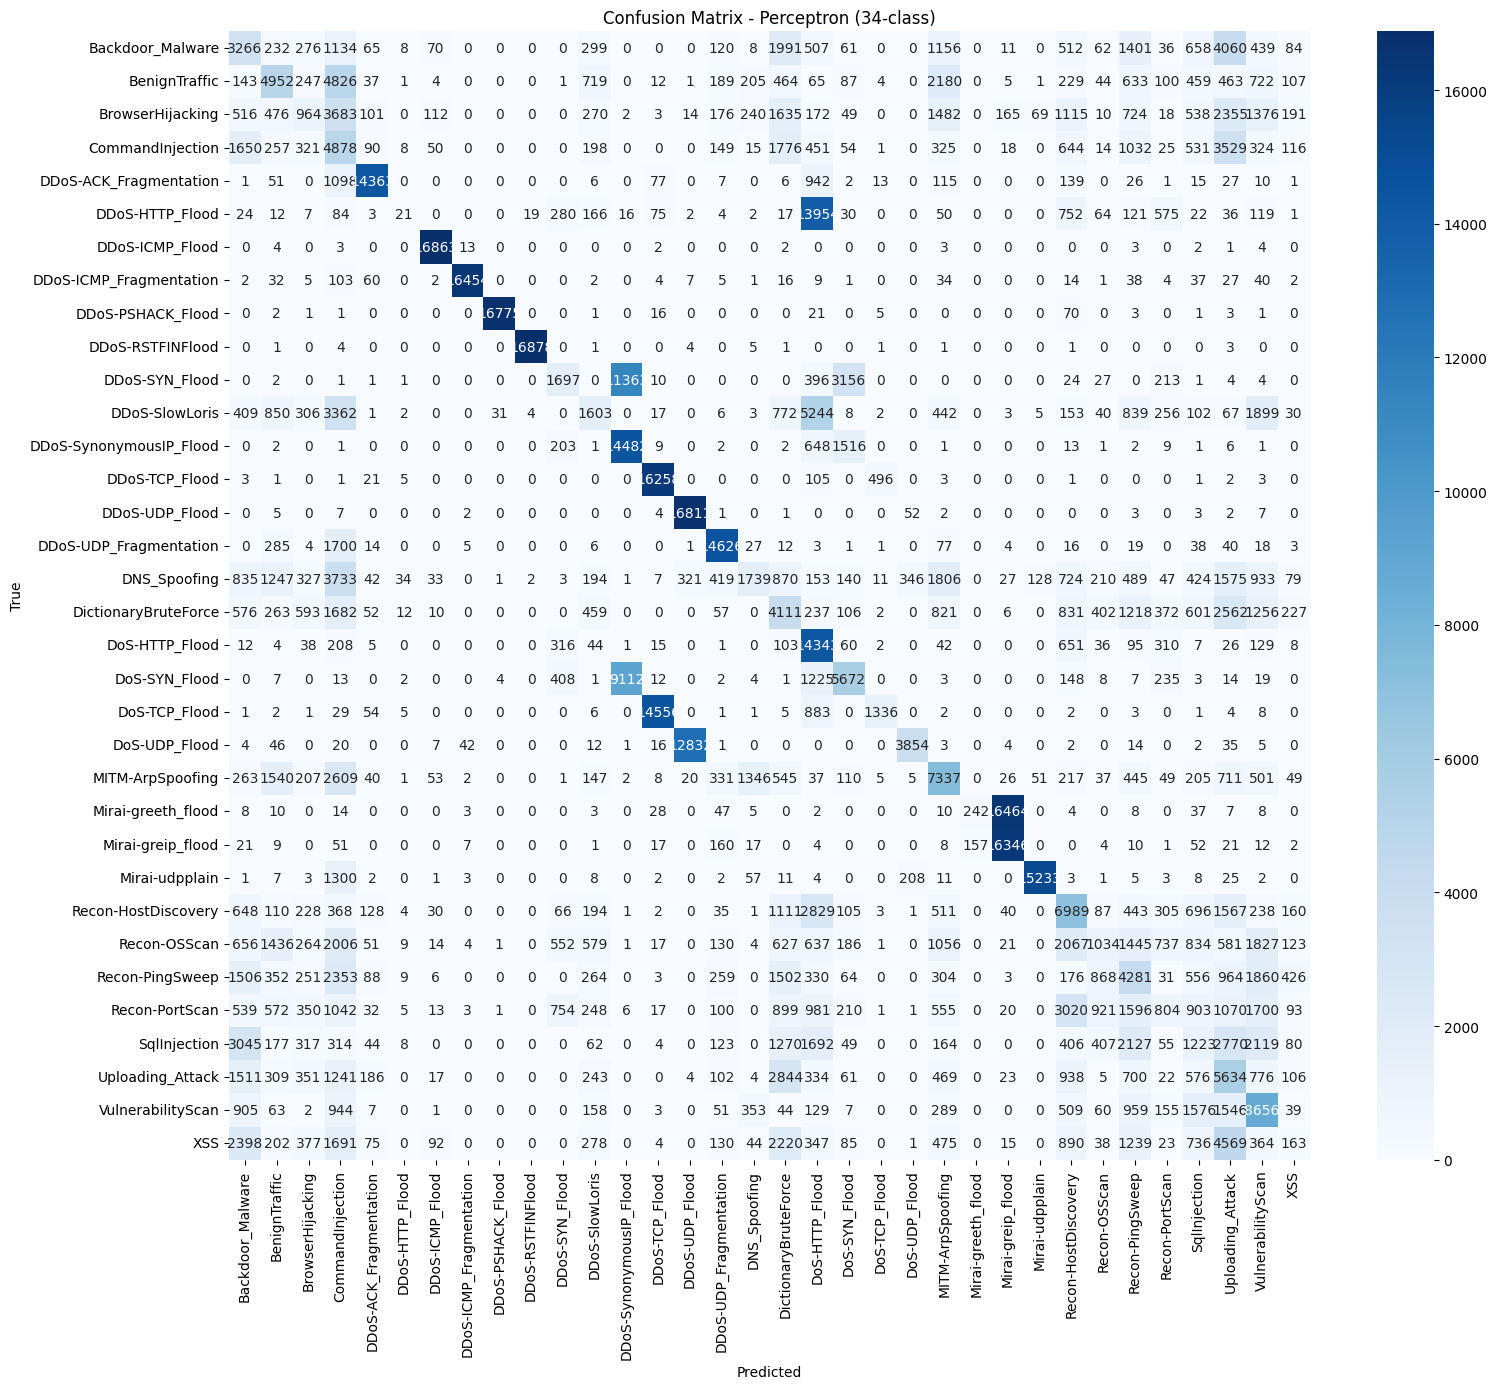

In [10]:
start = time.time()
perc = Perceptron(max_iter=1000, random_state=42)
perc.fit(X_train, y_train)
y_pred_perc = perc.predict(X_test)
end = time.time()

print(f"🕒 Perceptron time: {end - start:.2f} seconds")
evaluate_model(y_test, y_pred_perc, class_names, "Perceptron (34-class)")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
31997/31997 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.5935 - loss: 1.0983 - val_accuracy: 0.6878 - val_loss: 0.8375
Epoch 2/20
31997/31997 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.6650 - loss: 0.8935 - val_accuracy: 0.6960 - val_loss: 0.8097
Epoch 3/20
31997/31997 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.6738 - loss: 0.8718 - val_accuracy: 0.7014 - val_loss: 0.7925
Epoch 4/20
31997/31997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.6808 - loss: 0.8565 - val_accuracy: 0.7002 - val_loss: 0.7924
Epoch 5/20
31997/31997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.6809 - loss: 0.8519 - val_accuracy: 0.7079 - val_loss: 0.7793
Epoch 6/20
31997/31997 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.6872 - loss: 0.8410 - val_accuracy: 0.7130 - val_loss: 0.7660
Epoch 7/20
31997/31997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.6882 - loss: 0.8460 - val_accuracy: 0.7131 - val_loss: 0.7580
Epoch 8/20
31997/31997 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 

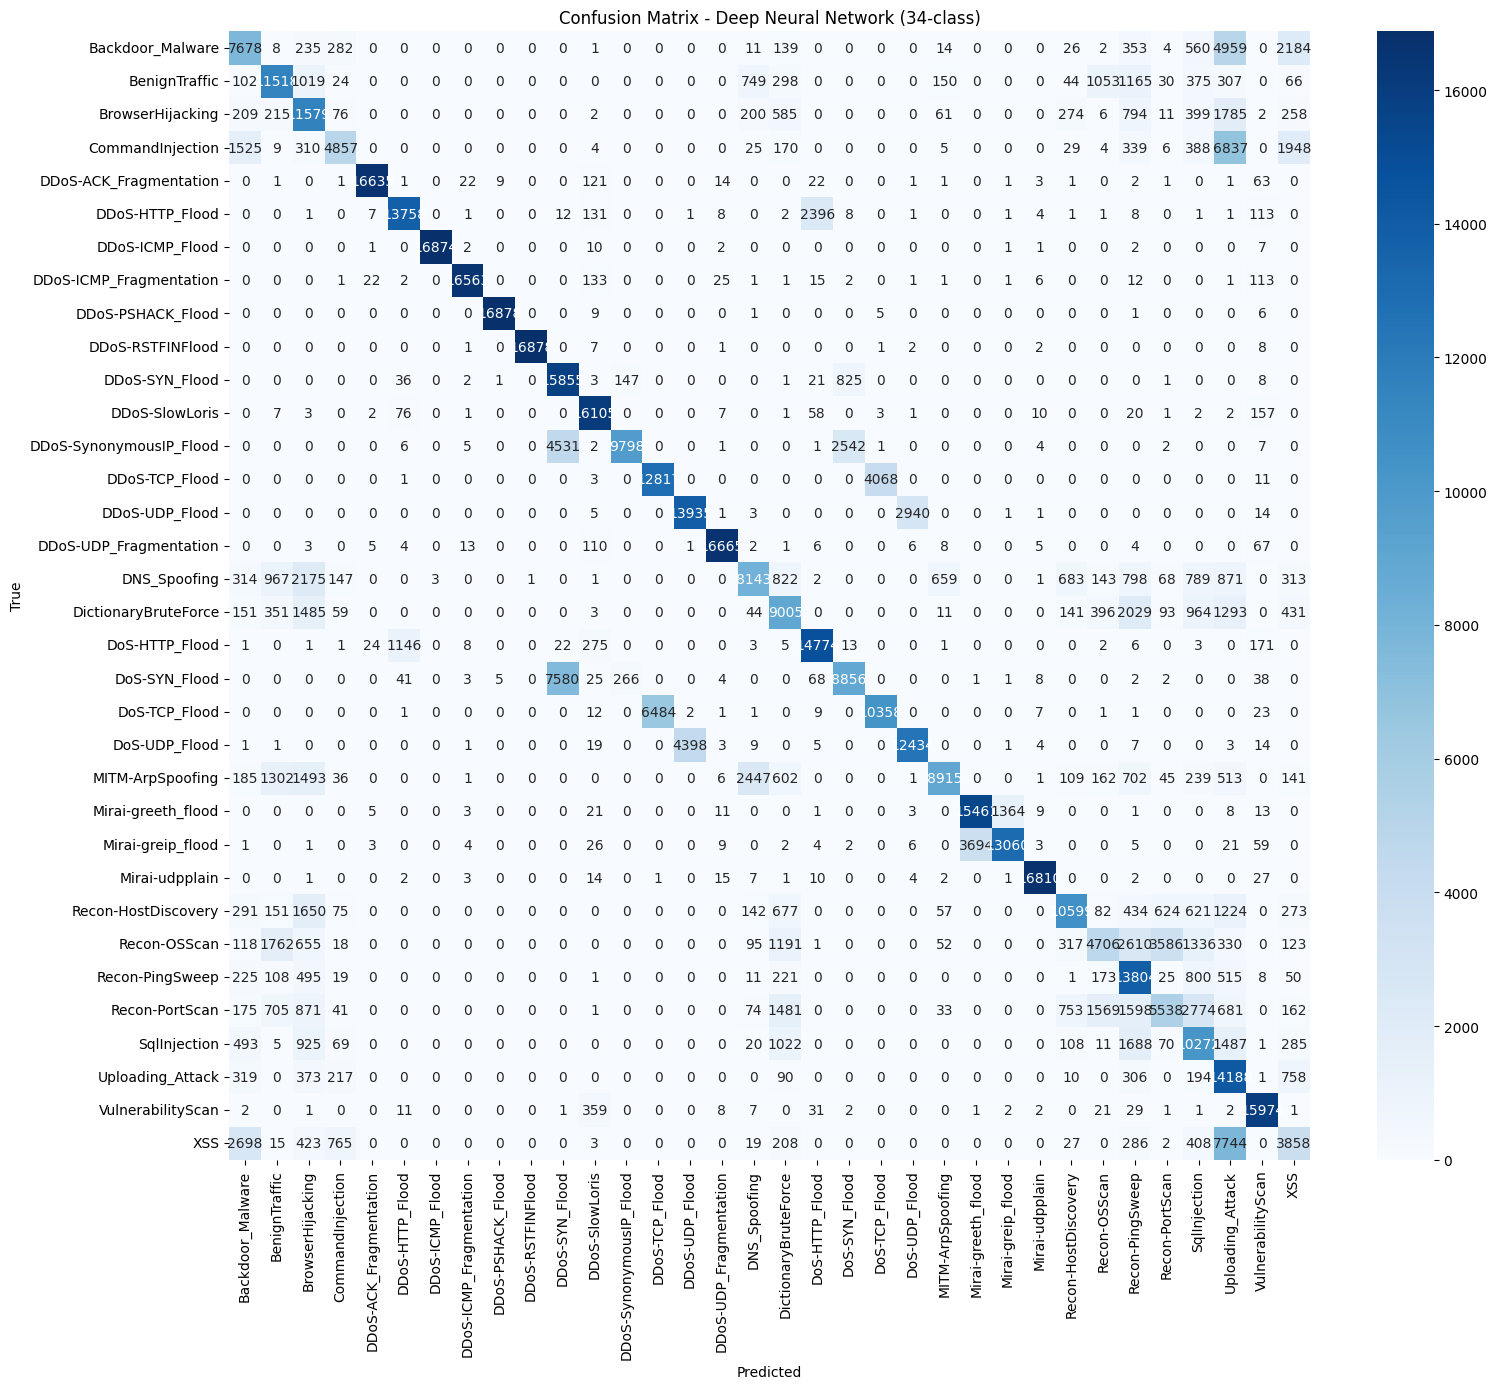

In [6]:
# One-hot encode labels for DNN
y_train_cat = to_categorical(y_train, num_classes=len(class_names))
y_test_cat = to_categorical(y_test, num_classes=len(class_names))

# Build DNN
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train DNN
start = time.time()
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=64, validation_split=0.1, verbose=1)
end = time.time()
print(f"🕒 DNN training time: {end - start:.2f} seconds")

# Predict and evaluate
y_pred_dnn = model.predict(X_test)
y_pred_dnn_labels = np.argmax(y_pred_dnn, axis=1)
evaluate_model(y_test, y_pred_dnn_labels, class_names, "Deep Neural Network (34-class)")
